In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)


In [5]:
x_train=train_data.flow_from_directory(r"Training",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_data.flow_from_directory(r"esting",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3407 images belonging to 5 classes.
Found 757 images belonging to 5 classes.


In [6]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [7]:
model=Sequential()

In [8]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation="relu"))


In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [10]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())


In [12]:
model.add(Dense(units=400,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=400,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=400,kernel_initializer="random_uniform",activation="relu"))

In [13]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))


In [14]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [16]:
model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)


C:\Users\Laevi Jerisha\AppData\Local\Temp\ipykernel_11604\3507143097.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)


Epoch 1/30
108/108 [==============================] - 53s 490ms/step - loss: 1.2601 - accuracy: 0.4312 - val_loss: 1.1310 - val_accuracy: 0.5284


In [17]:
model.save("flower.h5")


In [18]:
#test the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


In [19]:
model=load_model("flower.h5")


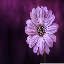

In [21]:
img=image.load_img("rose1.jpg",target_size=(64,64))
img

In [22]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [23]:
pred_prob=model.predict(x)


1/1 [==============================] - 1s 679ms/step


In [24]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]


In [25]:
pred_id=pred_prob.argmax(axis=1)[0]
pred_id

2

In [26]:
print("Predicted flower is",str(class_name[pred_id]))


Predicted flower is Rose
